# Import all the necessary libraries

In [221]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# Load the dataset 

In [222]:
x_train = np.loadtxt(r'C:\Users\ASUS\OneDrive\Desktop\Jupyter notebooks\CNNImages\input.csv', delimiter=',')
y_train = np.loadtxt(r'C:\Users\ASUS\OneDrive\Desktop\Jupyter notebooks\CNNImages\labels.csv', delimiter=',')

x_test = np.loadtxt(r'C:\Users\ASUS\OneDrive\Desktop\Jupyter notebooks\CNNImages\input_test.csv', delimiter=',')
y_test = np.loadtxt(r'C:\Users\ASUS\OneDrive\Desktop\Jupyter notebooks\CNNImages\labels_test.csv', delimiter=',')

# Reshape and Normalize

In [223]:
x_train = x_train.reshape(len(x_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)

x_test = x_test.reshape(len(x_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)

x_train = x_train / 255
x_test = x_test / 255

In [224]:
print("Shape of x_train is : ",x_train.shape)
print("Shape of y_train is : ",y_train.shape)
print("Shape of x_test is : ",x_test.shape)
print("Shape of y_test is : ",y_test.shape)

Shape of x_train is :  (2000, 100, 100, 3)
Shape of y_train is :  (2000, 1)
Shape of x_test is :  (400, 100, 100, 3)
Shape of y_test is :  (400, 1)


In [196]:
x_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

# Visualise a random image

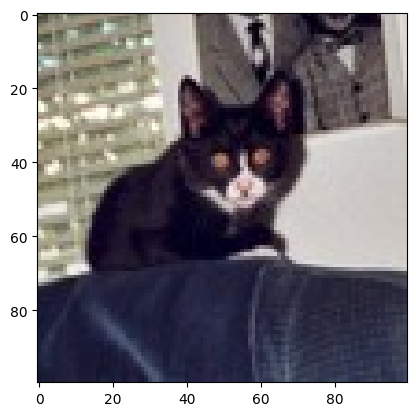

In [197]:
idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx, :])

# Build the model

In [198]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2,2),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),

     Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Model Summary

In [199]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 21, 21, 32)        9248      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 10, 10, 32)      

#  Compile the model 

In [225]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Train the model

In [201]:
history = model.fit(x_train, y_train, epochs = 25, batch_size = 64, validation_split=0.2)
history

Epoch 1/25
25/25 [==============================] - 1s 31ms/step - loss: 0.6680 - accuracy: 0.6206 - val_loss: 1.1716 - val_accuracy: 0.0000e+00
Epoch 2/25
25/25 [==============================] - 0s 17ms/step - loss: 0.6472 - accuracy: 0.6250 - val_loss: 0.7981 - val_accuracy: 0.0825
Epoch 3/25
25/25 [==============================] - 0s 17ms/step - loss: 0.6157 - accuracy: 0.6488 - val_loss: 0.7981 - val_accuracy: 0.3750
Epoch 4/25
25/25 [==============================] - 0s 18ms/step - loss: 0.5676 - accuracy: 0.7169 - val_loss: 0.6913 - val_accuracy: 0.5900
Epoch 5/25
25/25 [==============================] - 0s 17ms/step - loss: 0.5507 - accuracy: 0.7169 - val_loss: 1.2439 - val_accuracy: 0.1625
Epoch 6/25
25/25 [==============================] - 0s 17ms/step - loss: 0.5084 - accuracy: 0.7331 - val_loss: 1.4776 - val_accuracy: 0.1800
Epoch 7/25
25/25 [==============================] - 0s 17ms/step - loss: 0.4905 - accuracy: 0.7525 - val_loss: 0.7347 - val_accuracy: 0.5725
Epoch 8/2

# Plot training curves

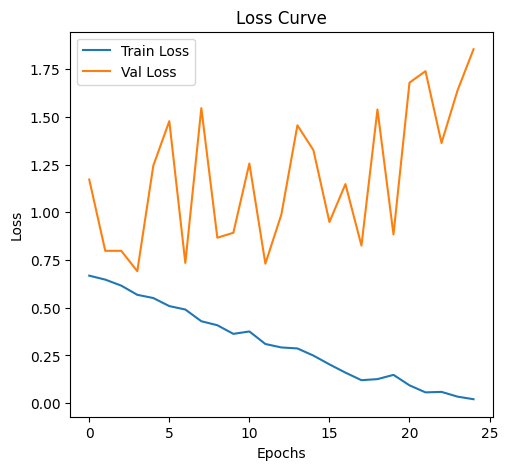

In [202]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

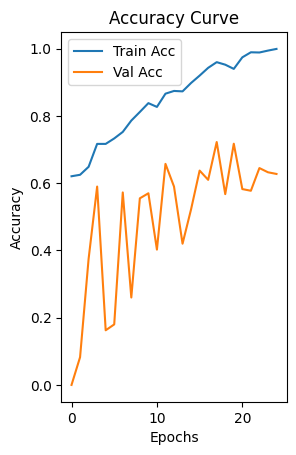

In [203]:
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### NOTE : Since the size of the dataset is small, there is a huge difference in the loss curve

# Evaluate the test set

In [204]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")


13/13 [==============================] - 0s 5ms/step - loss: 1.3592 - accuracy: 0.7050
Test Loss: 1.3592, Test Accuracy: 0.7050


In [205]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 4ms/step - loss: 1.3592 - accuracy: 0.7050


[1.3591983318328857, 0.7049999833106995]

# Predict and display a few test images

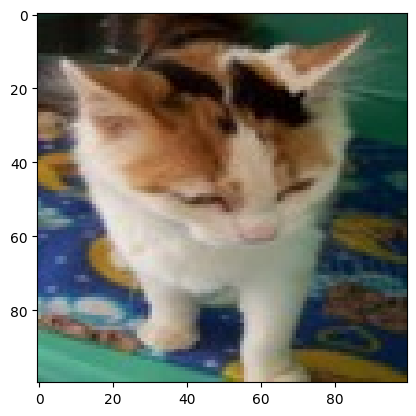

1/1 [==============================] - 0s 23ms/step
The model says it is a :  Cat


In [237]:
idx2 = random.randint(0, len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()

y_pred = model.predict(x_test[idx2, :].reshape(1, 100, 100, 3))

y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'Dog'
else:
    pred = 'Cat'


print("The model says it is a : ",pred)